## 【問題1】各種手法の実行

In [1]:
!pip list

Package                    Version
-------------------------- -------------------
absl-py                    0.12.0
albumentations             0.5.2
appnope                    0.1.2
argon2-cffi                20.1.0
astor                      0.8.1
async-generator            1.10
attrs                      20.3.0
backcall                   0.2.0
bleach                     3.3.0
cached-property            1.5.2
certifi                    2020.12.5
cffi                       1.14.3
click                      7.1.2
cloudpickle                1.6.0
cryptography               3.4.7
cycler                     0.10.0
cytoolz                    0.11.0
dask                       2021.3.0
decorator                  4.4.2
defusedxml                 0.7.1
emoji                      0.6.0
entrypoints                0.3
gast                       0.4.0
gensim                     4.0.1
google-pasta               0.2.0
grpcio                     1.36.1
h5py                       3.2.1
idna            

In [2]:
!pip install --upgrade numpy

  Using cached numpy-1.20.2-cp37-cp37m-macosx_10_9_x86_64.whl (16.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.3
    Uninstalling numpy-1.19.3:
      Successfully uninstalled numpy-1.19.3


In [10]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''



from __future__ import print_function

import tensorflow as tf

#from keras.preprocessing import sequence
#from keras.models import Sequential
#from keras.layers import Dense, Embedding
#from keras.layers import LSTM
#from keras.datasets import imdb
#from keras import backend as K

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU, ConvLSTM2D
from tensorflow.keras.datasets import imdb
from tensorflow.keras import backend as K

### SimpleRNN

In [11]:
max_features = 10000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=3,
                validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                                                  batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,313,025
Trainable params: 1,313,025
Non-trainable params: 0
_________________________________________________________________
None
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 138s 6ms/sample - loss: 0.6896 - acc: 0.5390 - val_loss: 0.6846 - val_acc: 0.5411
Epoch 2/3
250

### GRU

In [12]:
max_features = 10000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=3,
                validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                                                  batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
gru (GRU)                    (None, 128)               98688     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 1,378,817
Trainable params: 1,378,817
Non-trainable params: 0
_________________________________________________________________
None
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 425s 17ms/sample - loss: 0.4800 - acc: 0.7642 - val_loss: 0.3872 - val_acc: 0.8281
Epoch 2/3
25

### LSTM

In [8]:
max_features = 10000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())


# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...


/Users/teruitakahiro/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/teruitakahiro/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________
None
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 466s 19ms/sample - loss: 0.4707 - acc: 0.7756 - val_loss: 0.3815 - val_acc: 0.8330
Epoch 2/3
25000/25000 [=====

### ConvLSTM2D

In [23]:
""" 
This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""

#from keras.models import Sequential
#from keras.layers.convolutional import Conv3D
from tensorflow.keras.layers import Conv3D
#from keras.layers.convolutional_recurrent import ConvLSTM2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

In [25]:
# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', 
               #data_format='channels_last'
              ))

print(model.summary())

seq.compile(loss='binary_crossentropy', optimizer='adadelta')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
gru (GRU)                    (None, 128)               98688     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 1,378,817
Trainable params: 1,378,817
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    
    return noisy_movies, shifted_movies

In [28]:
# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)

seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        #epochs=300, validation_split=0.05)
        epochs=3, validation_split=0.05)

/Users/teruitakahiro/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':
/Users/teruitakahiro/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Train on 950 samples, validate on 50 samples
Epoch 1/3
950/950 [==============================] - 2484s 3s/sample - loss: 0.8342 - val_loss: 0.6886
Epoch 2/3
950/950 [==============================] - 2409s 3s/sample - loss: 0.7764 - val_loss: 0.6695
Epoch 3/3
950/950 [==============================] - 2513s 3s/sample - loss: 0.7380 - val_loss: 0.6497


In [30]:
# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)

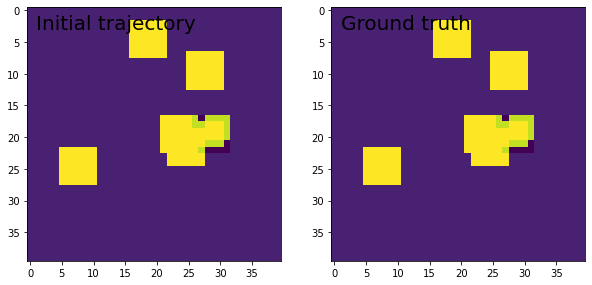

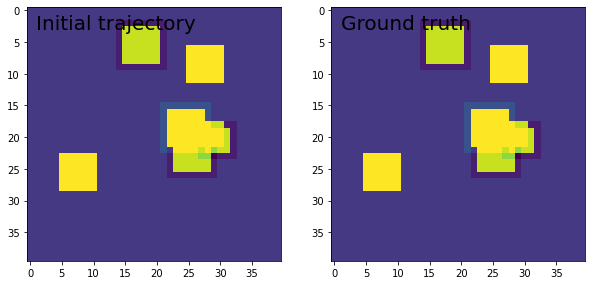

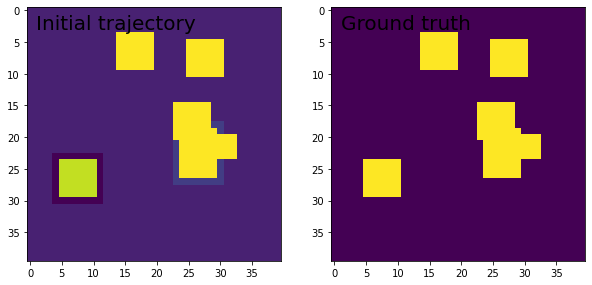

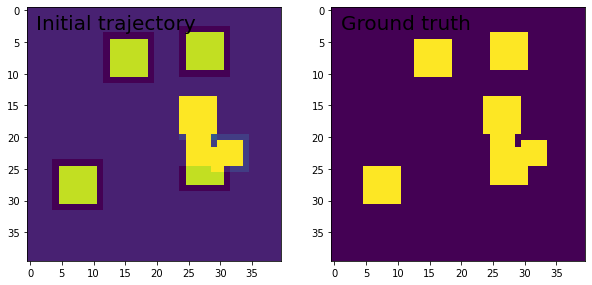

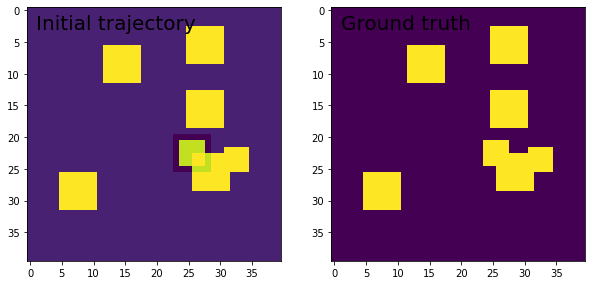

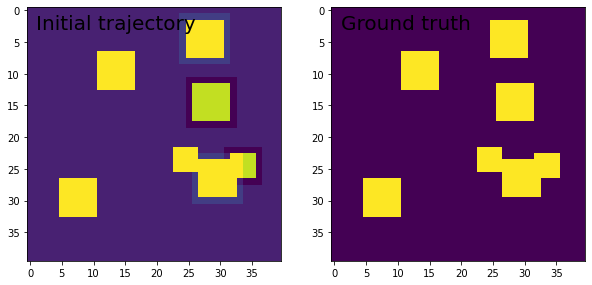

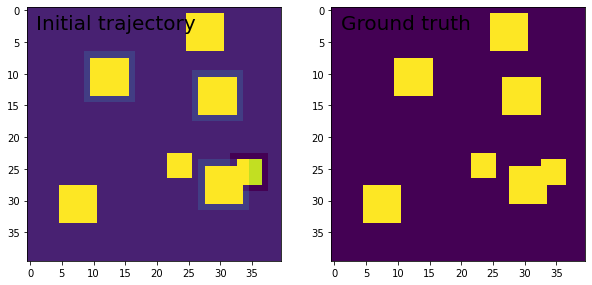

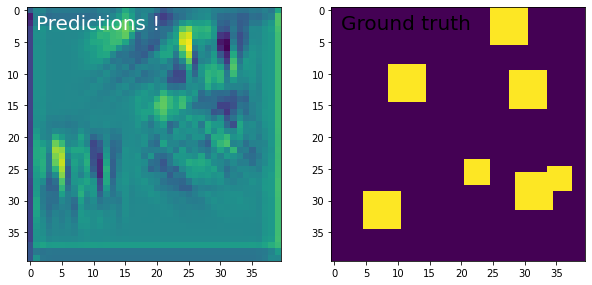

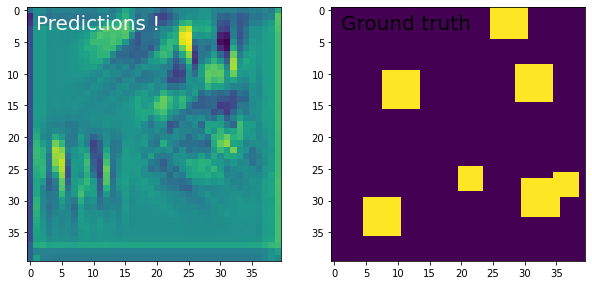

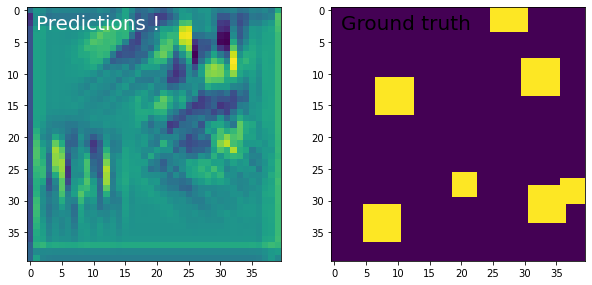

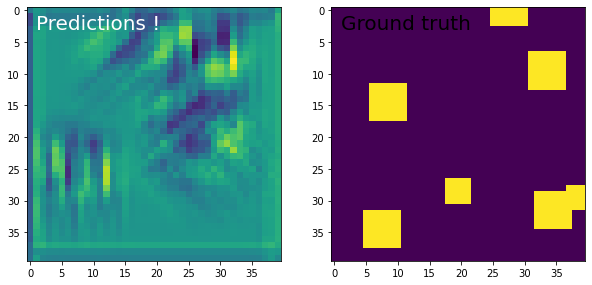

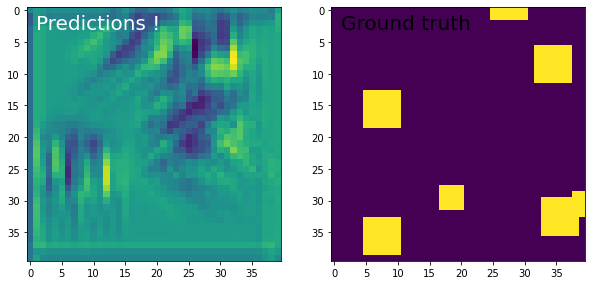

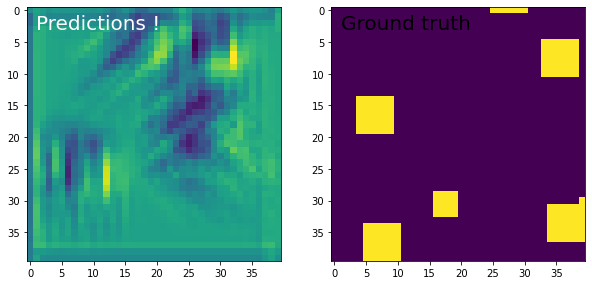

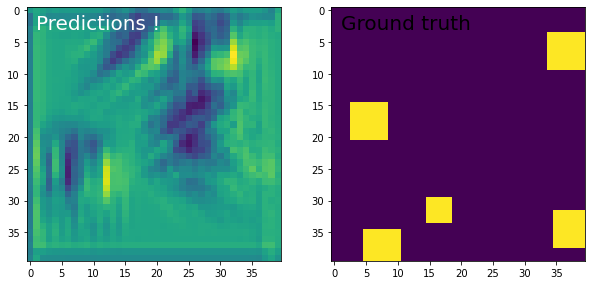

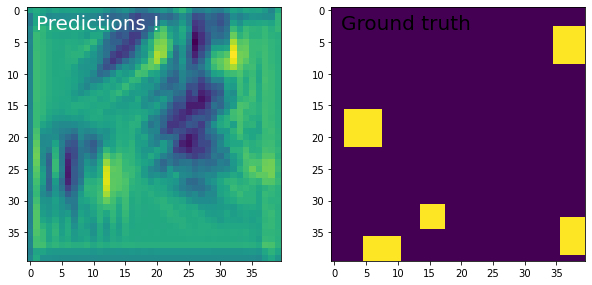

In [31]:
# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## 【問題3】他のクラスの説明

* RNN
  + 引数の cell に　SimpleRNNCell　メソッドや GRUCell, LSTMCell を組み込むことで、自由な組み合わせのRNNを構築できる

* SimpleRNNCell
  + 主に RNN に組み込んで使う、単一の全結合RNNユニット

* GRUCell
  + 主に RNN に組み込んで使う、単一のGRUユニット

* LSTMCell
  + 主に RNN に組み込んで使う、単一のLSTMユニット

* StackedRNNCells
  + 主に RNN に組み込んで使う、RNNセルのブロック（スタック）を単一のセルとして扱うユニット

* CuDNNGRU
  + NVIDIA cuDNN （GPU）上でのみ動作する、高速なGRU

* CuDNNLSTM
  + NVIDIA cuDNN （GPU）上でのみ動作する、高速なLSTM


In [ ]:
keras.layers.RNN(cell, 
                 return_sequences=False, 
                 return_state=False,
                 go_backwards=False, 
                 stateful=False, 
                 unroll=False
                )


keras.layers.SimpleRNN(units, 
                       activation='tanh', 
                       use_bias=True, 
                       kernel_initializer='glorot_uniform', 
                       recurrent_initializer='orthogonal', 
                       bias_initializer='zeros', 
                       kernel_regularizer=None, 
                       recurrent_regularizer=None, 
                       bias_regularizer=None, 
                       activity_regularizer=None, 
                       kernel_constraint=None, 
                       recurrent_constraint=None, 
                       bias_constraint=None, 
                       dropout=0.0, 
                       recurrent_dropout=0.0, 
                       return_sequences=False, 
                       return_state=False, 
                       go_backwards=False, 
                       stateful=False, 
                       unroll=False
                      )


keras.layers.SimpleRNNCell(units, 
                           activation='tanh', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform', 
                           recurrent_initializer='orthogonal', 
                           bias_initializer='zeros', 
                           kernel_regularizer=None, 
                           recurrent_regularizer=None, 
                           bias_regularizer=None, 
                           kernel_constraint=None, 
                           recurrent_constraint=None, 
                           bias_constraint=None, 
                           dropout=0.0, 
                           recurrent_dropout=0.0
                          )


keras.layers.GRUCell(units, 
                     activation='tanh', 
                     recurrent_activation='hard_sigmoid', 
                     use_bias=True, 
                     kernel_initializer='glorot_uniform', 
                     recurrent_initializer='orthogonal', 
                     bias_initializer='zeros', 
                     kernel_regularizer=None, 
                     recurrent_regularizer=None, 
                     bias_regularizer=None, 
                     kernel_constraint=None, 
                     recurrent_constraint=None, 
                     bias_constraint=None, 
                     dropout=0.0, 
                     recurrent_dropout=0.0, 
                     implementation=1
                    )


keras.layers.LSTMCell(units, 
                      activation='tanh', 
                      recurrent_activation='hard_sigmoid', 
                      use_bias=True, 
                      kernel_initializer='glorot_uniform', 
                      recurrent_initializer='orthogonal', 
                      bias_initializer='zeros', 
                      unit_forget_bias=True, 
                      kernel_regularizer=None, 
                      recurrent_regularizer=None, 
                      bias_regularizer=None, 
                      kernel_constraint=None, 
                      recurrent_constraint=None, 
                      bias_constraint=None, 
                      dropout=0.0, 
                      recurrent_dropout=0.0, 
                      implementation=1
                     )


keras.layers.CuDNNLSTM(units, 
                       kernel_initializer='glorot_uniform', 
                       recurrent_initializer='orthogonal', 
                       bias_initializer='zeros', 
                       unit_forget_bias=True, 
                       kernel_regularizer=None, 
                       recurrent_regularizer=None, 
                       bias_regularizer=None, 
                       activity_regularizer=None, 
                       kernel_constraint=None, 
                       recurrent_constraint=None, 
                       bias_constraint=None, 
                       return_sequences=False, 
                       return_state=False, 
                       stateful=False
                      )


keras.layers.GRU(units, 
                 activation='tanh', 
                 recurrent_activation='hard_sigmoid', 
                 use_bias=True, 
                 kernel_initializer='glorot_uniform', 
                 recurrent_initializer='orthogonal', 
                 bias_initializer='zeros', 
                 kernel_regularizer=None, 
                 recurrent_regularizer=None,
                 bias_regularizer=None, 
                 activity_regularizer=None, 
                 kernel_constraint=None, 
                 recurrent_constraint=None, 
                 bias_constraint=None, 
                 dropout=0.0, 
                 recurrent_dropout=0.0, 
                 implementation=1, 
                 return_sequences=False, 
                 return_state=False, 
                 go_backwards=False, 
                 stateful=False, 
                 unroll=False, 
                 reset_after=False
                )


keras.layers.CuDNNGRU(units, 
                      kernel_initializer='glorot_uniform',
                      recurrent_initializer='orthogonal', 
                      bias_initializer='zeros', 
                      kernel_regularizer=None, 
                      recurrent_regularizer=None, 
                      bias_regularizer=None, 
                      activity_regularizer=None, 
                      kernel_constraint=None, 
                      recurrent_constraint=None, 
                      bias_constraint=None, 
                      return_sequences=False,
                      return_state=False,
                      stateful=False
                     )